In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML, display
import tabulate
import networkx as nx
from random import random as rand
import itertools

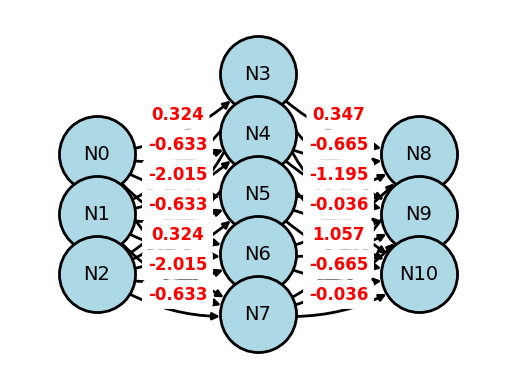

In [2]:
data = {
    'num_habitaciones': [2, 3, 4, 2, 5, 3, 4, 1, 3, 5],
    'tamano_m2': [50, 70, 90, 45, 120, 65, 80, 30, 75, 150],
    'antiguedad': [5, 10, 2, 20, 1, 15, 3, 25, 8, 2],
    'moderna': [0, 1, 1, 0, 1, 0, 1, 0, 0, 1],
    'agradable': [1, 1, 0, 1, 0, 1, 0, 0, 1, 0],
    'tradicional': [0, 0, 1, 0, 0, 1, 0, 1, 0, 0]
}

# Convertir a DataFrame
df = pd.DataFrame(data)

# Parámetros de la red
input_size = 3  # Neuronas en la capa de entrada (número de características)
hidden_size = 5  # Neuronas en la capa oculta
output_size = 3  # Neuronas en la capa de salida (número de estilos)

learning_rate = 0.01  # Tasa de aprendizaje para el gradiente descendente

# Pesos aleatorios para conexiones entre entrada y oculta
synaptic_weights_1 = np.random.randn(input_size, hidden_size)
# Pesos aleatorios para conexiones entre oculta y salida
synaptic_weights_2 = np.random.randn(hidden_size, output_size)

# Función de activación (Ejemplo: Sigmoide)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivada de la función sigmoide para usar en la retropropagación
def sigmoid_derivative(x):
    return x * (1 - x)

# Forward propagation
def forward_propagation(inputs):
    # Calcular la salida de la capa oculta
    hidden_layer_input = np.dot(inputs, synaptic_weights_1)  # Producto de punto de entrada y pesos
    hidden_layer_output = sigmoid(hidden_layer_input)  # Aplicar la función de activación

    # Calcular la salida de la capa de salida
    output_layer_input = np.dot(hidden_layer_output, synaptic_weights_2)  # Producto punto
    output_layer_output = sigmoid(output_layer_input)  # Aplicar la función de activación

    return hidden_layer_output, output_layer_output  # Retornar las salidas

# Back propagation
def back_propagation(inputs, hidden_output, output, target):
    global synaptic_weights_1, synaptic_weights_2

    # Calcular el error de salida
    output_error = target - output  # Diferencia entre salida deseada y salida real
    output_delta = output_error * sigmoid_derivative(output)  # Error ajustado por derivada de activación

    # Calcular el error en la capa oculta
    hidden_error = output_delta.dot(synaptic_weights_2.T)  # Propagar el error hacia atrás
    hidden_delta = hidden_error * sigmoid_derivative(hidden_output)  # Ajustar por derivada de activación

    # Actualizar pesos usando gradiente descendente
    synaptic_weights_2 += hidden_output.T.dot(output_delta) * learning_rate
    synaptic_weights_1 += inputs.T.dot(hidden_delta) * learning_rate

# Entrenar la red
for epoch in range(10000):  # Número de iteraciones (épocas)
    for i in range(len(df)):
        # Obtener las entradas y las salidas deseadas
        inputs = df.iloc[i, :3].values.reshape(1, -1)  # Características
        target = df.iloc[i, 3:].values.reshape(1, -1)  # Estilos

        # Forward propagation
        hidden_output, output = forward_propagation(inputs)

        # Back propagation
        back_propagation(inputs, hidden_output, output, target)

# Graficar la red
# Crear un grafo dirigido
G = nx.DiGraph()

# Definir las capas y relaciones entre nodos
layers = [[0, 1, 2], [3, 4, 5, 6, 7], [8, 9, 10]]  # Índices de las neuronas

# Relaciones entre neuronas (producto cartesiano entre las capas)
rels_input_hidden = list(itertools.product(layers[0], layers[1]))
rels_hidden_output = list(itertools.product(layers[1], layers[2]))
rels = rels_input_hidden + rels_hidden_output

# Etiquetas para los nodos
labels = {i: f"N{i}" for i in range(len([x for sublist in layers for x in sublist]))}

# Posición de los nodos
pos = {}
for i, layer in enumerate(layers):
    for j, neuron in enumerate(layer):
        pos[neuron] = (i, len(layer) - j * 1.5)  # Aumentar espacio entre nodos

# Crear etiquetas de pesos (mostrando algunos aleatorios)
weights_labels_input_hidden = {
    (ra, rb): "{:0.3f}".format(synaptic_weights_1[i % input_size][j % hidden_size]) 
    for i, (ra, rb) in enumerate(rels_input_hidden)
}
weights_labels_hidden_output = {
    (ra, rb): "{:0.3f}".format(synaptic_weights_2[i % hidden_size][j % output_size]) 
    for i, (ra, rb) in enumerate(rels_hidden_output)
}
weights_labels = {**weights_labels_input_hidden, **weights_labels_hidden_output}

# Agregar relaciones al grafo
G.add_edges_from(rels)

# Opciones de dibujo del grafo
options = {
    "font_size": 14,
    "node_size": 3000,
    "node_color": "lightblue",
    "edgecolors": "black",
    "linewidths": 2,
    "width": 2,
    "labels": labels,
    "connectionstyle": "arc3, rad=0.2",  # Estilo curvado para las conexiones
}

# Dibujar el grafo
nx.draw_networkx(G, pos, **options)

# Dibujar etiquetas de los pesos en las aristas
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=weights_labels,
    font_color='red',
    font_size=12,
    font_weight='bold',
    rotate=False  
)

# Quitar los ejes y mostrar el gráfico
plt.axis('off')
ax = plt.gca()
ax.margins(0.20)
plt.show()
